In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Step 2 -- Get Insight of data
## Basic EDA and Stastical analysis

In [3]:
# Check the number of Row and colums
print('Rows =',df.shape[0])
print('Columns =',df.shape[1])

Rows = 309
Columns = 16


**The dataset contains 309 rows and 16 columns.**

In [4]:
# Look general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Looking at the dataset and datatypes, we can see that only two of the columns are object types (categorical variables), rest are all integer types containing values 1 and 2, where 1 = No and 2 = Yes.**

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Fortunately, there are no missing values in this dataset.**

# First, we will change the data types of the categorical variables

In [8]:
df = pd.get_dummies(columns=['LUNG_CANCER','GENDER'], data = df, drop_first=True, dtype = int)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


**Male = 1 Female = 0**              
**Yes = 1 No = 0**

# Exploratory Data Analysis

In [10]:
# We can use a heatmap to check correlation between the variables.

<Axes: >

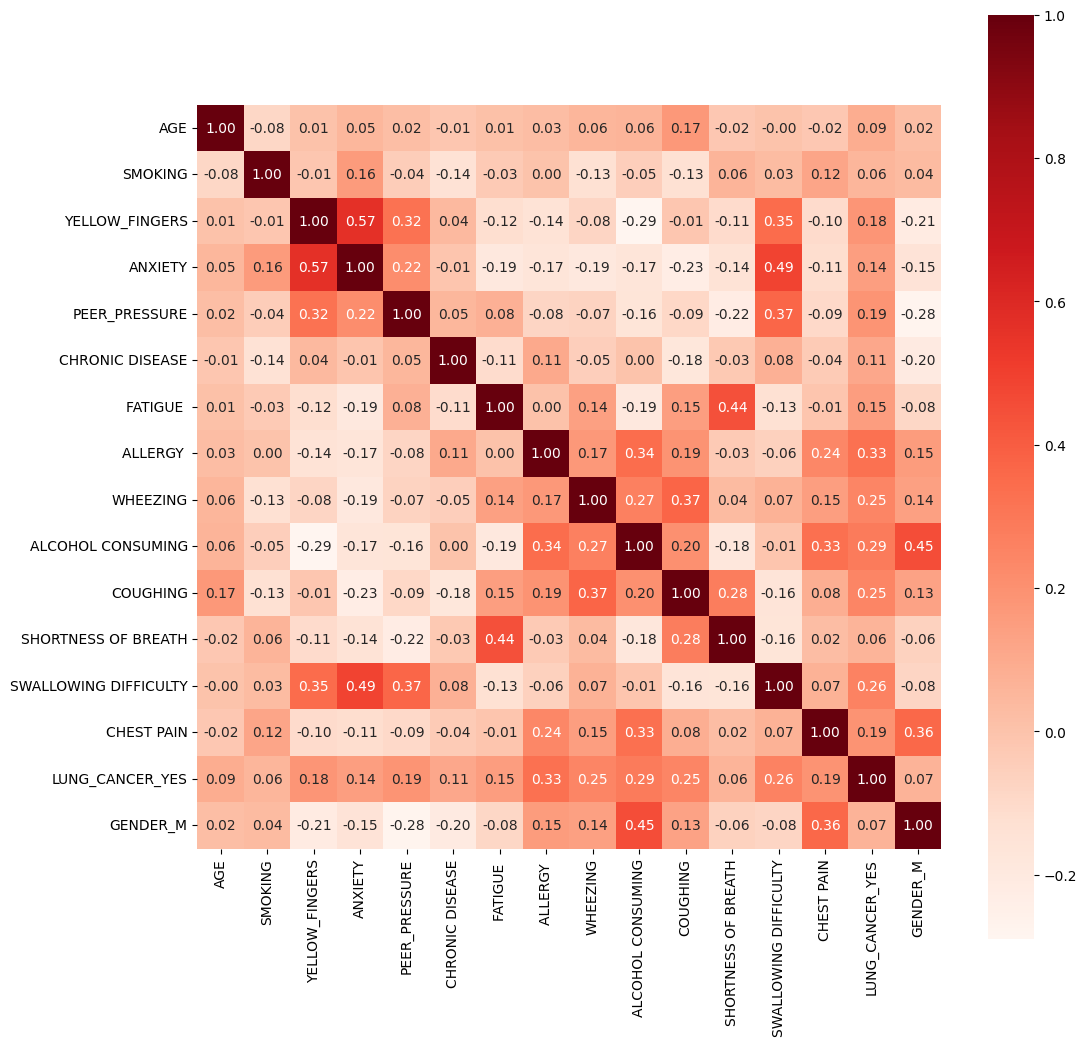

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,cmap='Reds')

**There aren't a lot of strong correlations among the different features except maybe some minor ones such as:**

* More anxiety leads to more difficulty in breathing
* More anxiety causes yellow fingers or it could be vice versa as any kind of changes in body may lead to increased anxiety
* Shortness of breath causes fatigue
* Increased anxiety makes it more difficult to swallow

**However, there isn't a lot of correlation between the symptoms and the target variable and this could be because of the type of data or surveyors.**

<Axes: >

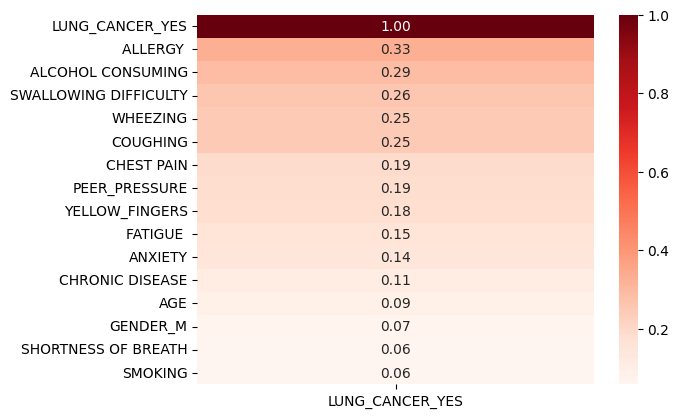

In [15]:
# We can use a heatmap to check correlation between the independet variables and target variable.
# plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[['LUNG_CANCER_YES']].sort_values(by='LUNG_CANCER_YES', ascending = False)
                                                       ,cbar=True,fmt='.2f',annot=True,cmap='Reds')